In [8]:
import warnings
warnings.filterwarnings('ignore')

#! pip install widgetsnbextension 
#! pip install ipywidgets 
#! pip install voila

#import ipywidgets as widgets
#from IPython.display import display, clear_output
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix


In [10]:
#!jupyter serverextension enable voila --sys-prefix

#!jupyter nbextension enable --py --sys-prefix widgetsnbextension
#!jupyter nbextension enable --py --sys-prefix bqplot

In [29]:
#! /Users/jordynabrams/opt/anaconda3/envs/CardioKid/bin/python -m pip install pandas

In [30]:
#! /Users/jordynabrams/opt/anaconda3/envs/CardioKid/bin/python -m pip install scipy

In [31]:
#! /Users/jordynabrams/opt/anaconda3/envs/CardioKid/bin/python -m pip install voila

In [32]:
#! /Users/jordynabrams/opt/anaconda3/envs/CardioKid/bin/python -m pip install ipywidgets 

In [33]:
#! /Users/jordynabrams/opt/anaconda3/envs/CardioKid/bin/python -m pip install widgetsnbextension

In [34]:
#! /Users/jordynabrams/opt/anaconda3/envs/CardioKid/bin/python -m pip install heartpy

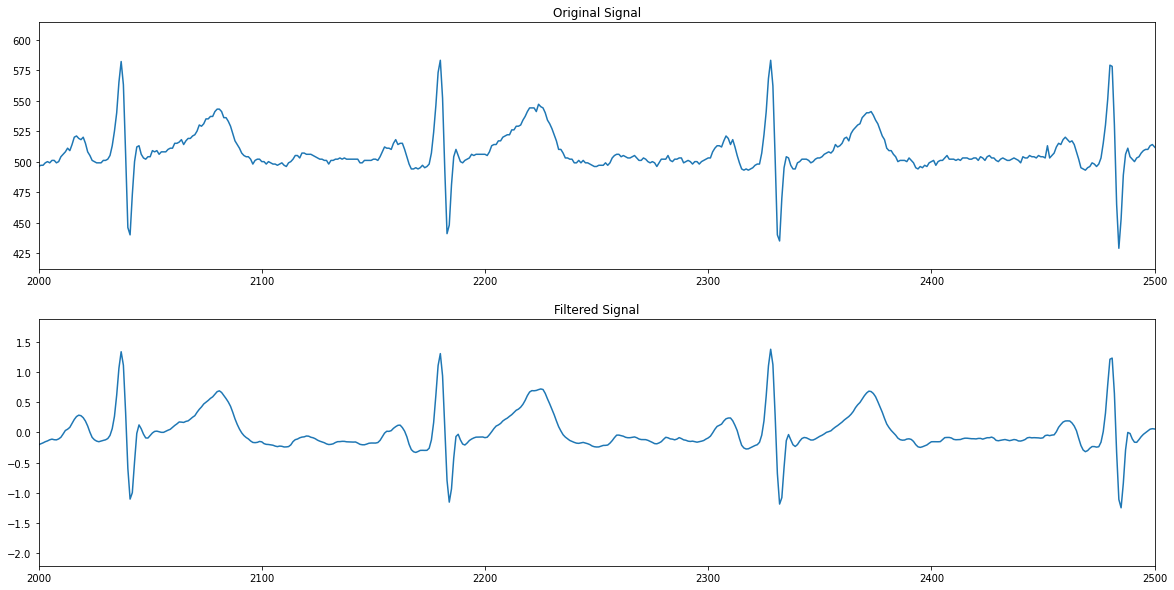

In [1]:
import scipy
import heartpy as hp
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import heartpy
rawdata = hp.get_data('Sample2.csv')
signal = rawdata
fs = 350

filter1= heartpy.filtering.smooth_signal(rawdata, sample_rate = 60, window_length=None, polyorder=3)


#baseline wander code
import numpy as np
import pandas as pd
import pylab
from scipy import signal
import matplotlib.pyplot as plt

# Butterworth Filter
def butter_highpass(cutoff, fs, order=6):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(filtered5, cutoff, fs, order=6):
    b, a = butter_highpass(cutoff, fs, order=order)
# b = numerator coefficient vector of the filter
# a = denominator coefficient vector of the filter
    y = signal.filtfilt(b, a, filtered5)
# this function applies a linear digital filter twice, once forward and once backwards
    return y

fps = 30 # arbitrary sampling frequency

# Determine an ideal cutoff frequency as the second argument
filter2 = butter_highpass_filter(filter1,0.1,fps)

from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False, output='ba')
    return b, a

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False, output='ba')
    return b, a

def notch_filter(cutoff, q):
    nyq = 0.5*fs
    freq = cutoff/nyq
    b, a = iirnotch(freq, q)
    return b, a

def highpass(data, fs, order=5):
    b,a = butter_highpass(cutoff_high, fs, order=order)
    x = lfilter(b,a,data)
    return x

def lowpass(data, fs, order =5):
    b,a = butter_lowpass(cutoff_low, fs, order=order)
    y = lfilter(b,a,data)
    return y

def notch(data, powerline, q):
    b,a = notch_filter(powerline,q)
    z = lfilter(b,a,data)
    return z

def final_filter(data, fs, order=5):
    b, a = butter_highpass(cutoff_high, fs, order=order)
    x = lfilter(b, a, data)
    d, c = butter_lowpass(cutoff_low, fs, order = order)
    y = lfilter(d, c, x)
    f, e = notch_filter(powerline, 30)
    z = lfilter(f, e, y)    
    return x
    return y
    return z

signal = filter2
fs = 350

cutoff_high = 0.2
cutoff_low = 150
powerline = 60
order = 5

#print(signal)

conditioned_signal = final_filter(signal, fs, order)

hsignal = highpass(signal, fs, order)

lsignal = lowpass(signal, fs, order)


filter3=lsignal

filter4=heartpy.filtering.filter_signal(filter3, cutoff=0.2, sample_rate=350, order=5, filtertype='highpass', return_top=False)
scaled=(filter4*200)/10000
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(range(len(rawdata)), rawdata)
pylab.xlim(2000,2500)

plt.title('Original Signal')
plt.subplot(212)

plt.plot(range(len(scaled)),scaled)
pylab.xlim(2000,2500)

plt.title('Filtered Signal')
plt.show()

In [1]:
pip list --format=freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Run on the command line to convert the notebook into a publishable HTML page.
#
# nbinteract {NOTEBOOK.ipynb} -s {BINDER_SPEC}
#
# Replace {BINDER_SPEC} with a Binder spec in the format
# {username}/{repo}/{branch} (e.g. SamLau95/nbinteract-image/master).
# The branch is optional; if omitted, defaults to `main`
#
# Replace {NOTEBOOK.ipynb} with the name of the notebook file to convert.
#
# For example:
#! nbinteract test.ipynb -s bmfelix123/bindertest